# 🏦 BANK CUSTOMER CHURN PREDICTION

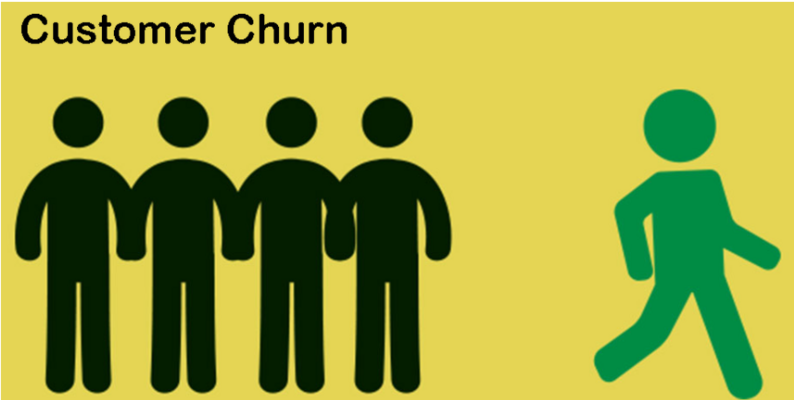

Welcome to Task 3 of The Codsoft Internship! Our primary objective for this project is to develop a machine learning model capable of predicting customer churn for a subscription-based service or business.  

The [Bank Customer Churn](https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction) dataset from Kaggle is the source of the dataset used in this project. This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.   
It consists of 10,000 records with demographic and bank history information from customers from three countries, France, Germany and Spain,


## 📥 Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sns.set_style('whitegrid')

## 📉 Loading the Dataset

In [2]:
df = pd.read_csv('./data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 🧹 Data Cleaning

In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 🔍 Exploratory Data Analysis (EDA):

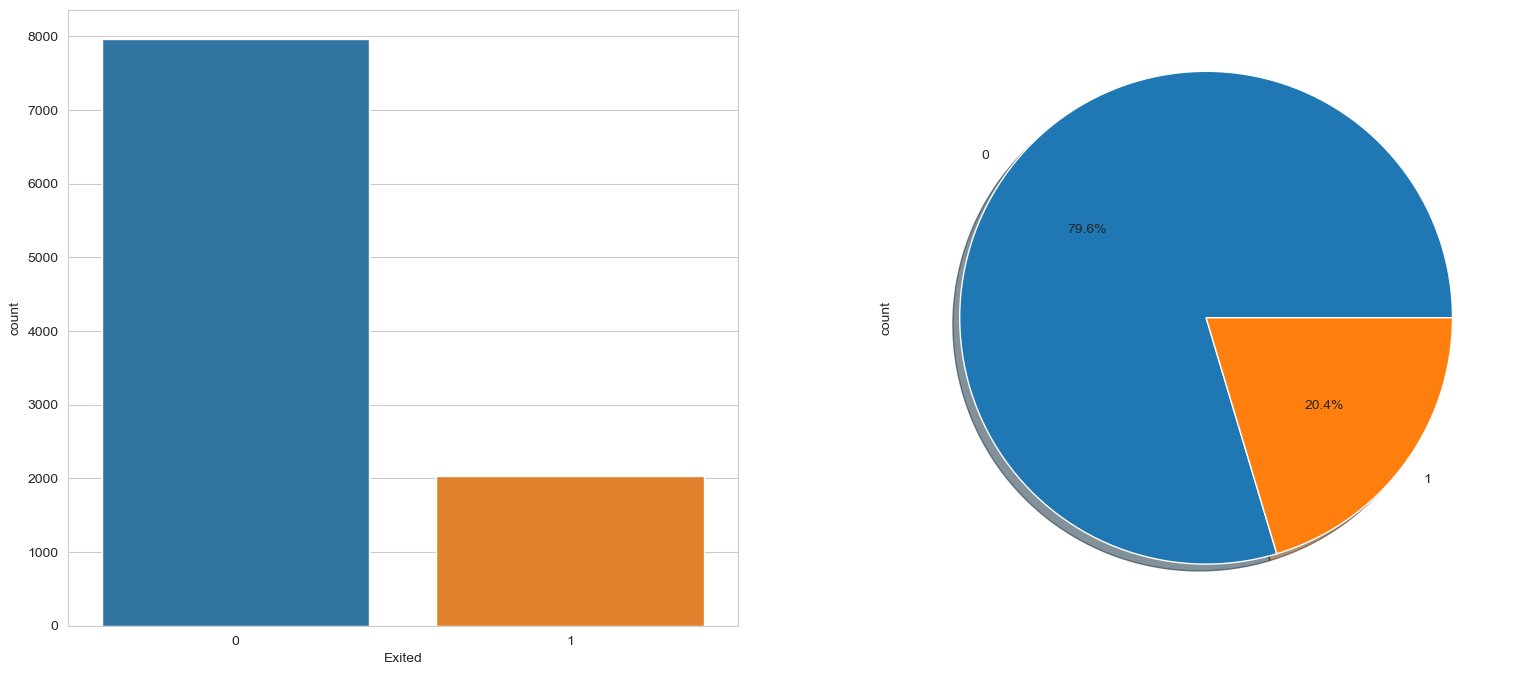

In [7]:
_, ax=plt.subplots(1,2,figsize=(19,8))

sns.countplot(x='Exited',data=df,ax=ax[0])
df['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)

plt.show()

We can see that the data is highly unbalanced. Almost 80% of our data comes from class 0 (not exited), while 20% comes from class 1 (exited).
In real life, we only care about the people who are quitting or leaving the bank (Exited), and we want to analyze their patterns. We will be employing metrics such as precision and recall.

Given the imbalance, these metrics offer a balanced evaluation of the model's ability to correctly identify instances of the positive class (label 1, representing customer churn) while minimizing false positives

### Distributions of Numeric Features

In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


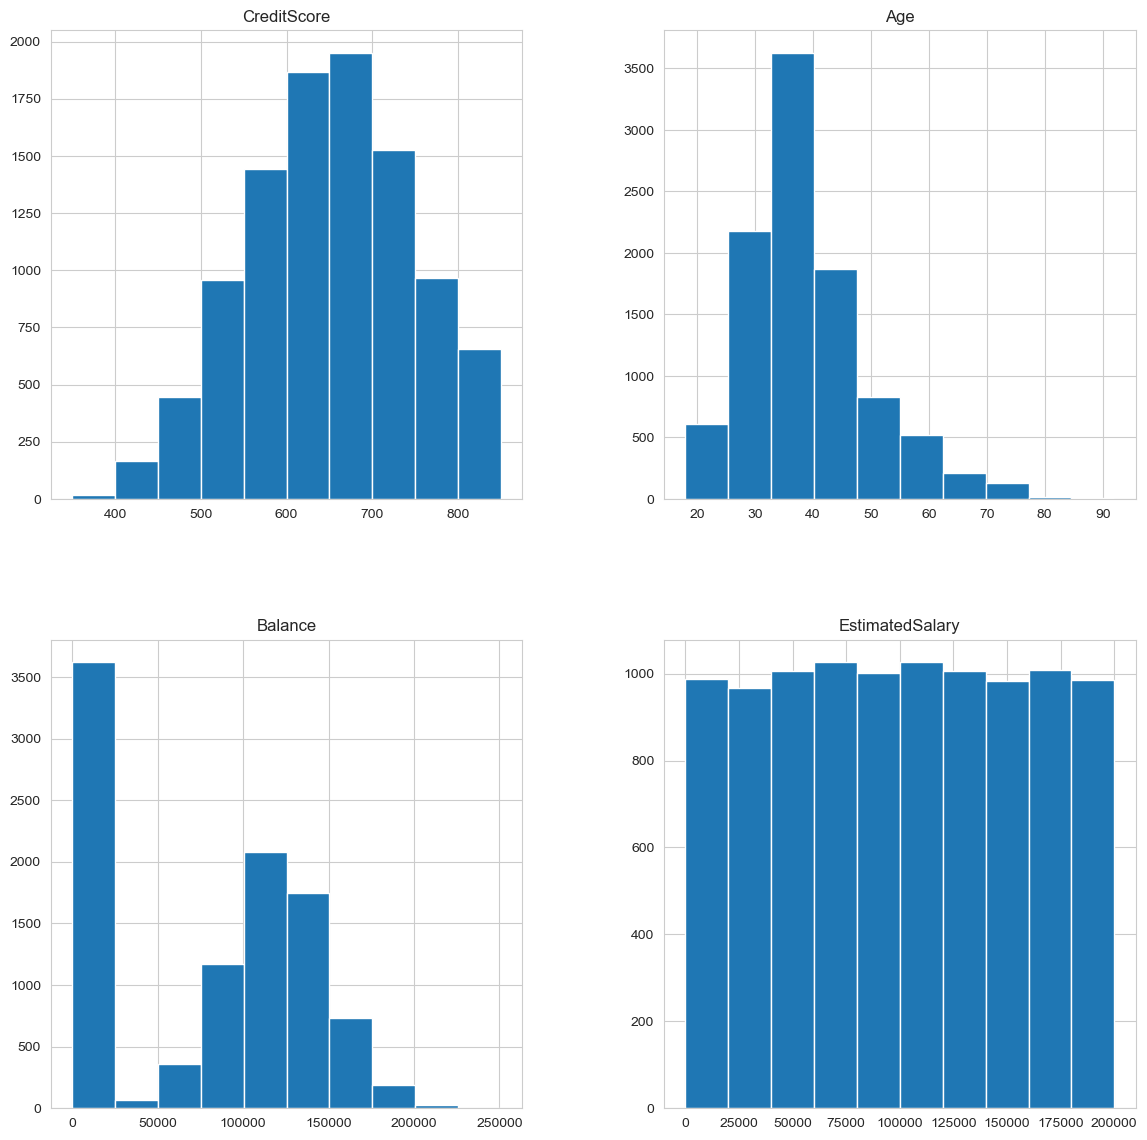

In [9]:
numerical_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

df[numerical_columns].hist(figsize=(14, 14))
plt.show()

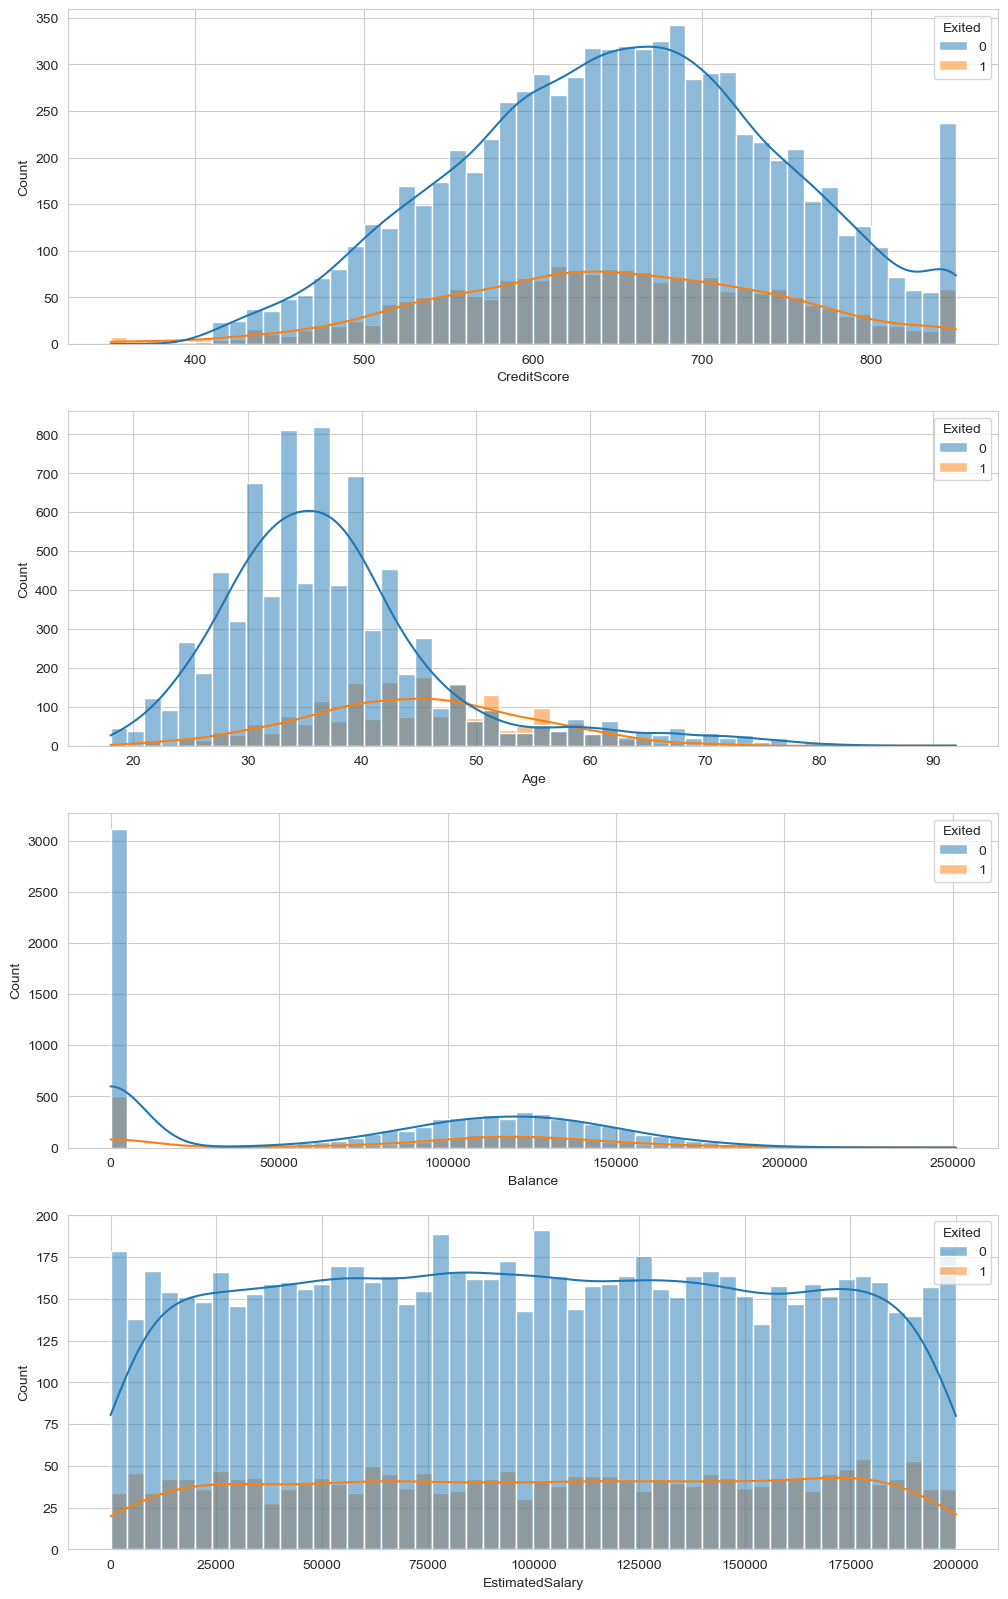

In [10]:
_, ax = plt.subplots(len(numerical_columns), 1, figsize=(12, 20))
for index, column in enumerate(numerical_columns):
    sns.histplot(data=df, x=column, hue="Exited", bins=50, kde=True, ax=ax[index])
    

## Distributions of Categorical Features

In [11]:
cat_columns = df.select_dtypes(include='object').columns.tolist()
cat_columns.extend(['NumOfProducts','HasCrCard','IsActiveMember'])
cat_columns

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

In [12]:
# Summarize categorical features
df.describe(include=['object'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


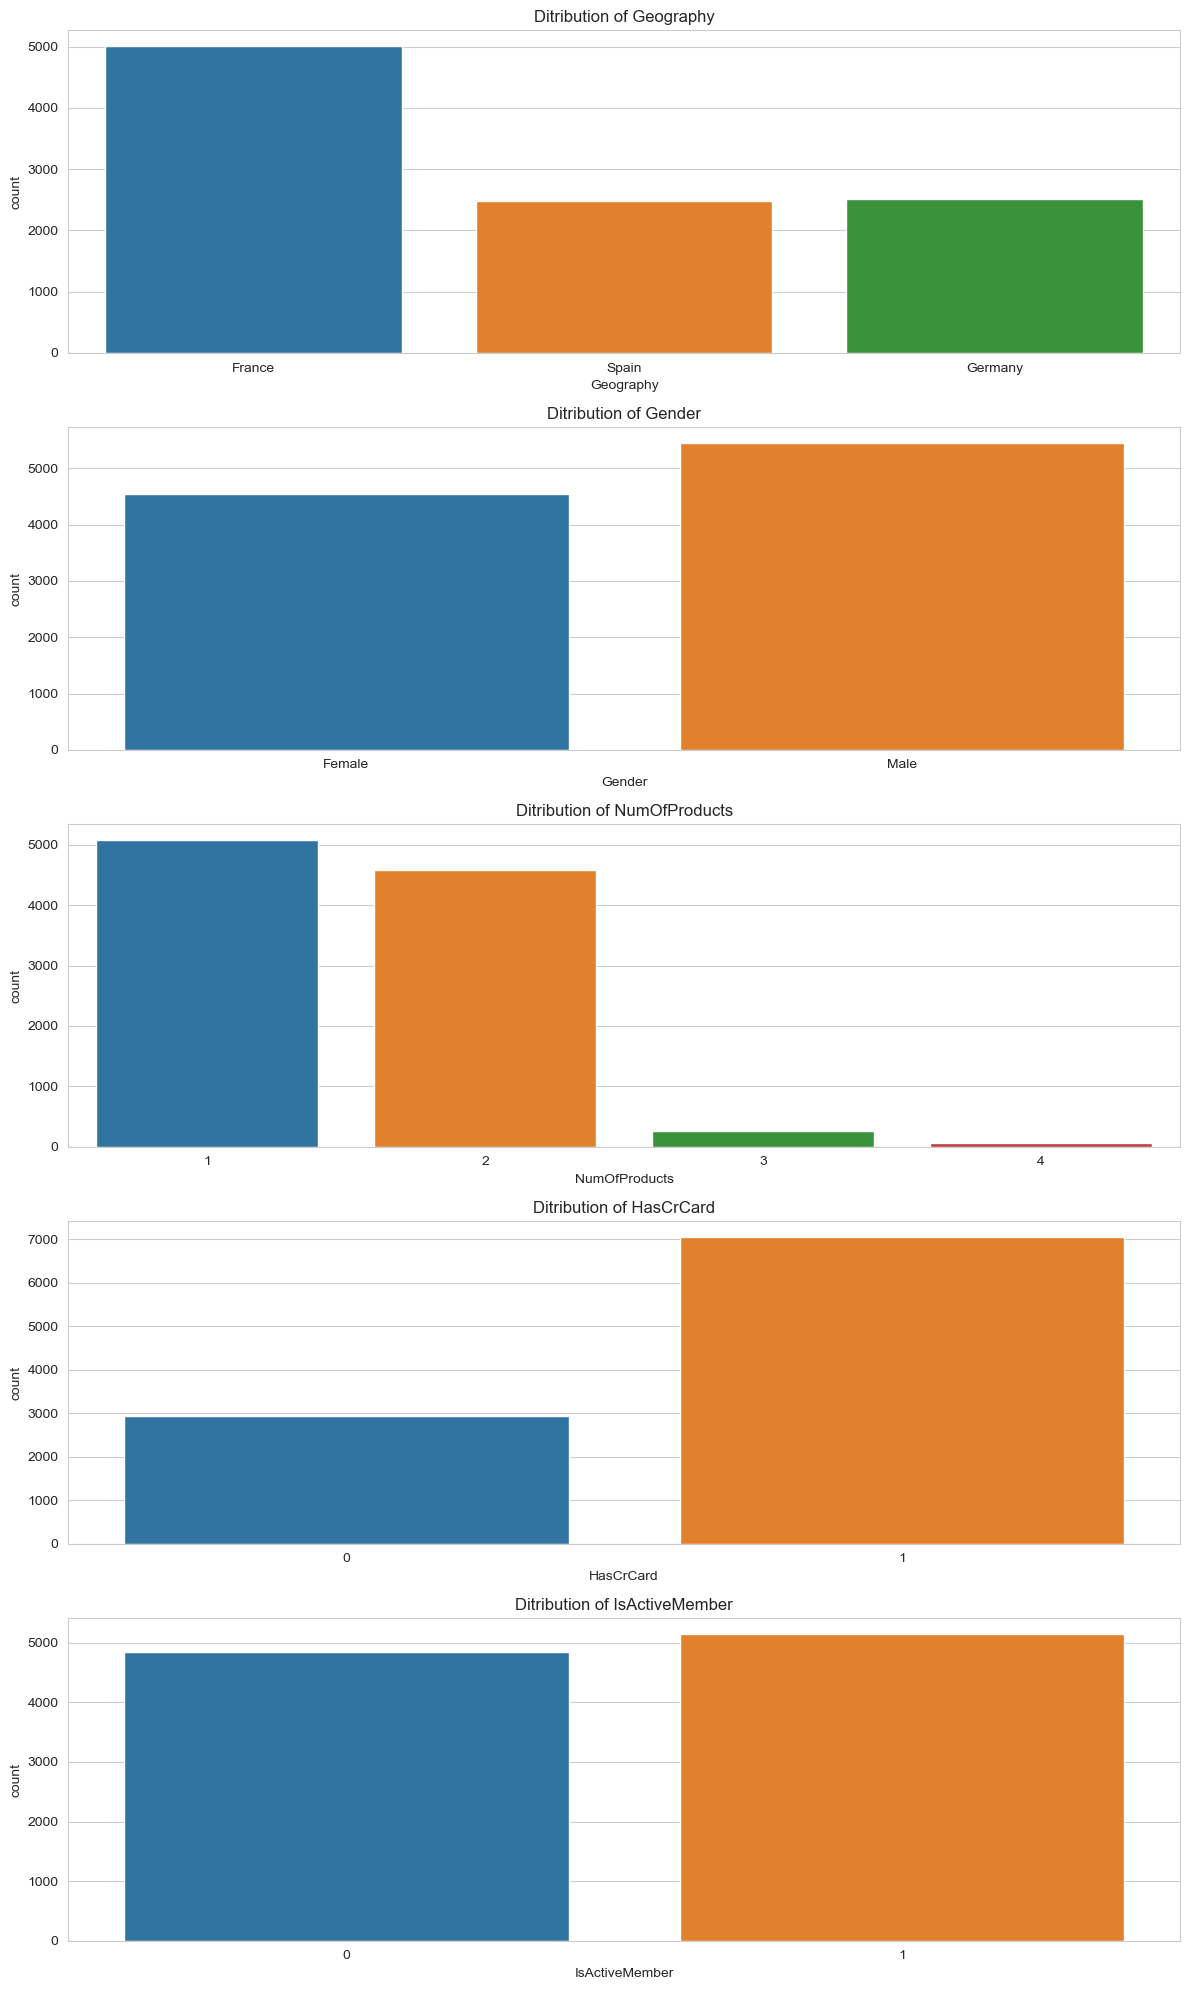

In [13]:
_, ax = plt.subplots(len(cat_columns), 1, figsize=(12, 20))

for index, column in enumerate(cat_columns):
    sns.countplot(x=column, data=df , ax=ax[index])
    ax[index].set_title(f'Ditribution of {column}')
    
plt.tight_layout()
plt.show()

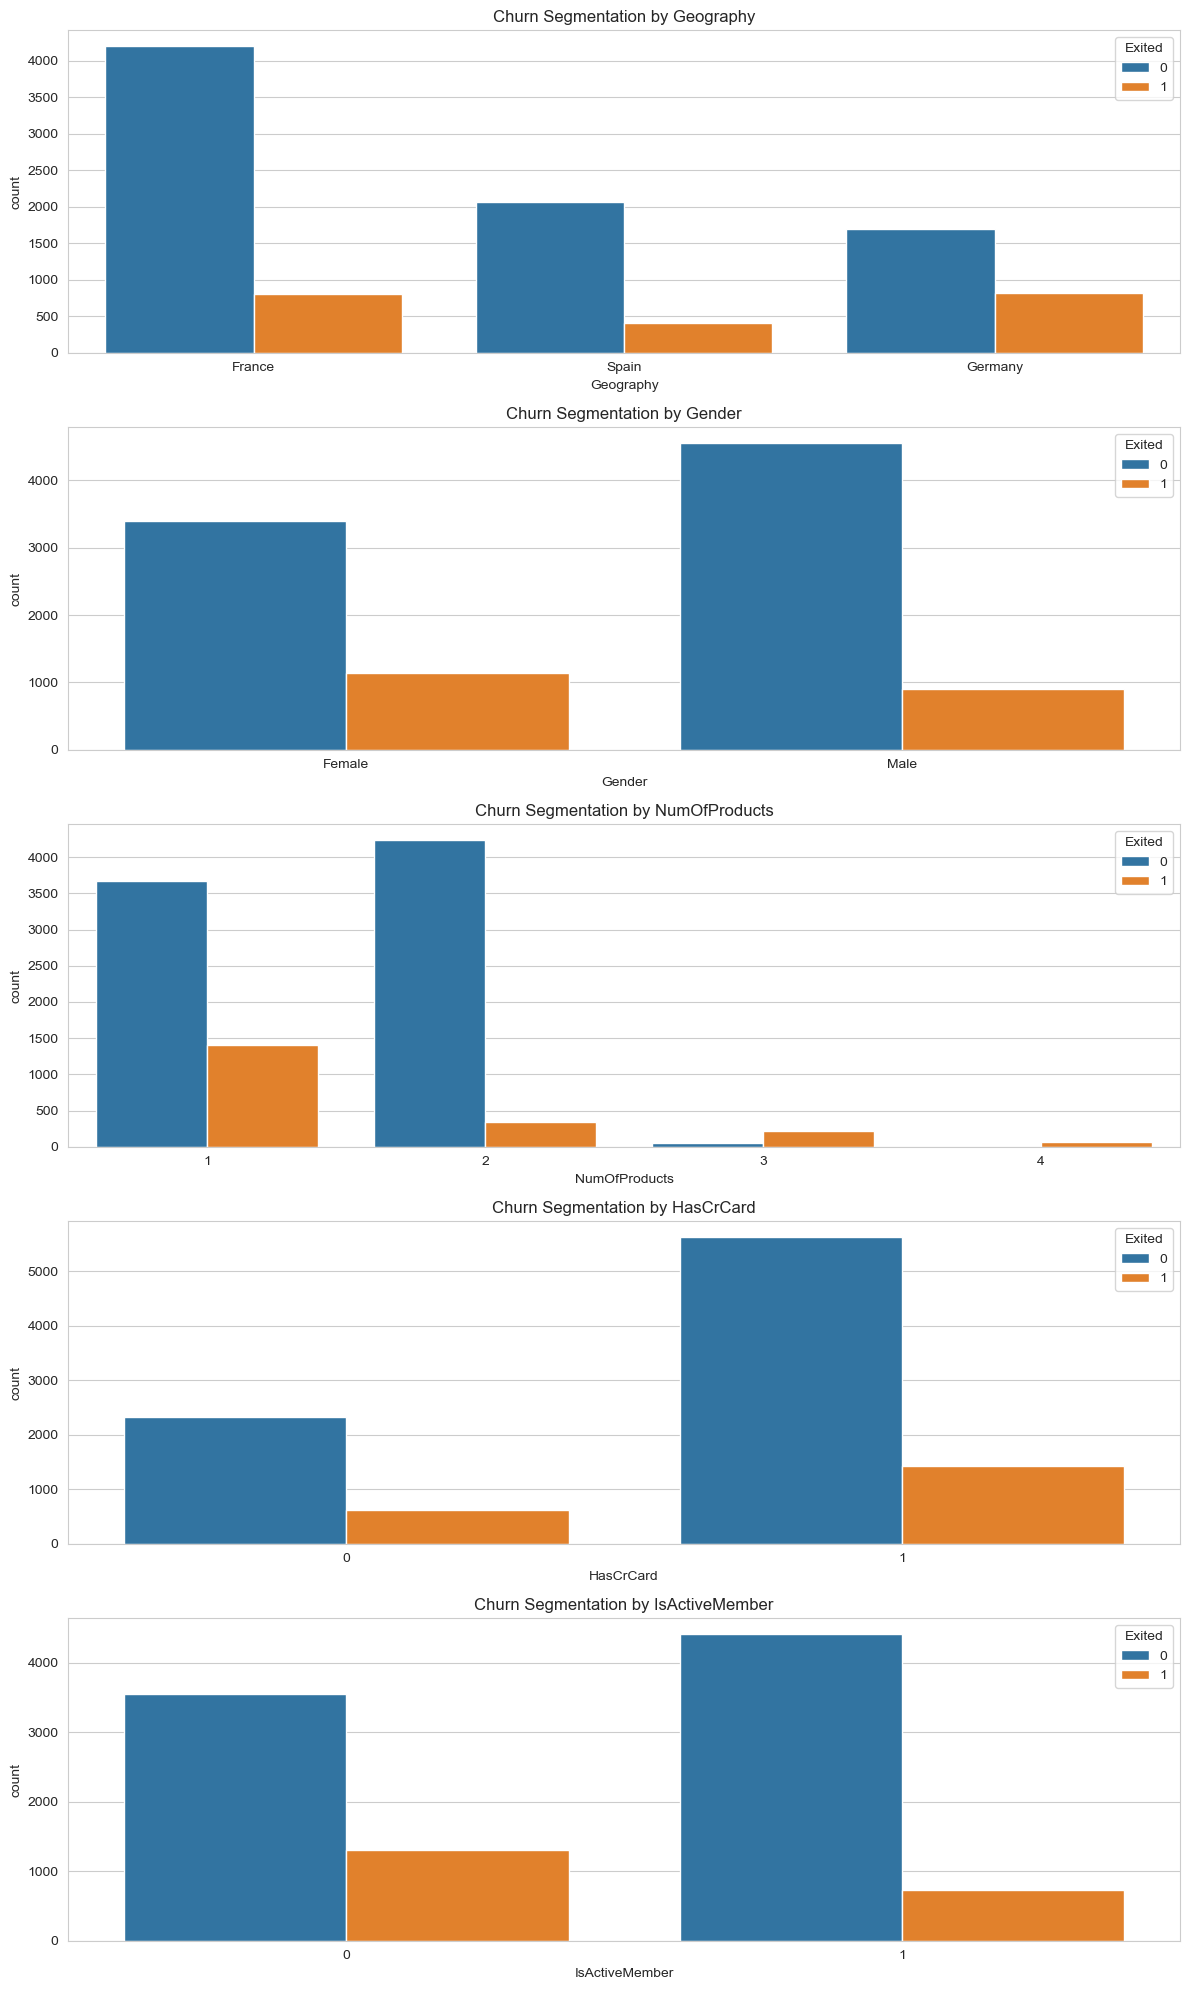

In [14]:
_, ax = plt.subplots(len(cat_columns), 1, figsize=(12, 20))
for index, column in enumerate(cat_columns):
    sns.countplot(x=column, data=df, hue='Exited', ax=ax[index])
    ax[index].set_title(f'Churn Segmentation by {column}')
plt.tight_layout()
plt.show()

## 🔄 Data Preprocessing

In [15]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Split the data into features (X) and the target variable (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

In [16]:
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,False,False,False
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,False,True,False
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,False,False,False
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,False,False,False
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,False,True,False


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

## 🚀 Train a Classifier

In [18]:
def test_models(models, X_train, y_train, X_test, y_test):
    scores = {}

    _, ax = plt.subplots(1, len(models), figsize=(20, 5))

    for index, model in tqdm(enumerate(models)):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        model_name = type(model).__name__

        # Append scores to the dictionary
        scores[model] = {
                            'accuracy score' : accuracy,
                            'classification report': report
                        }

        # Plot confusion matrix
        sns.heatmap(confusion_matrix(y_test, y_pred),cmap='Greens' ,annot=True, ax=ax[index], fmt=".0f")
        ax[index].set_title(model_name)
        
    return scores

0it [00:00, ?it/s]

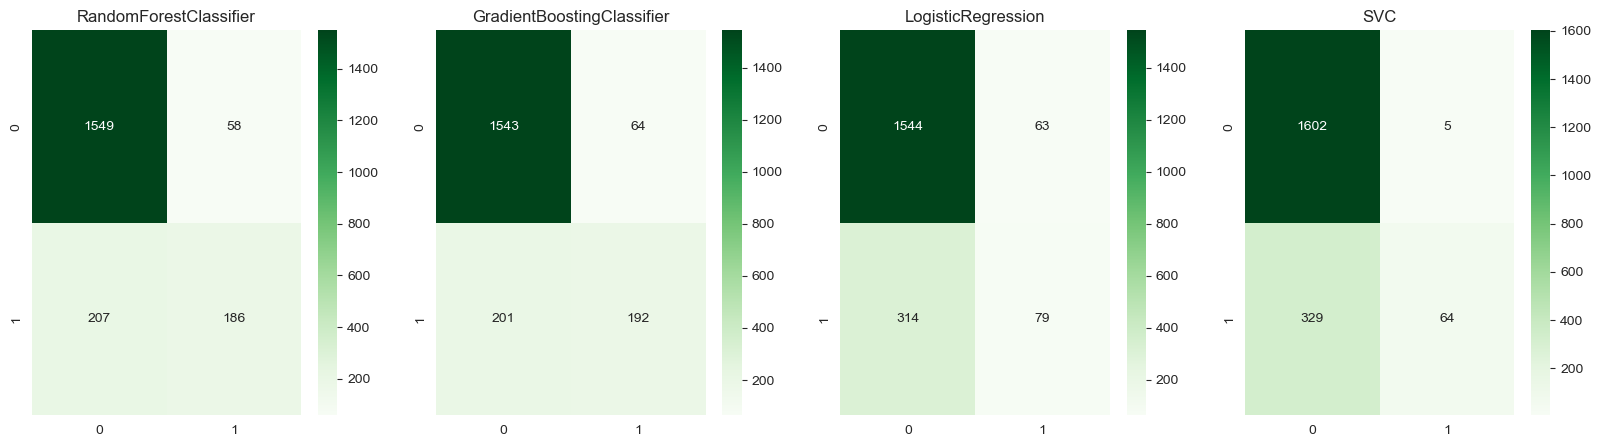

In [19]:
models = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC()
]

scores = test_models(models, X_train, y_train, X_test, y_test)

In [20]:
for model_name, metrics in scores.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy score']:.2f}")
    print("Classification Report:\n", metrics['classification report'])

Model: RandomForestClassifier()
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Model: GradientBoostingClassifier()
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Model: LogisticRegression()
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56 

Based on the result of the classification reports for different models, it appears that both the `RandomForestClassifier` and `GradientBoostingClassifier` achieved an accuracy of 0.87. However, when considering precision, recall, and F1-score for class 1 (indicating customer churn), the `GradientBoostingClassifier` outperforms the `RandomForestClassifier`